<a href="https://colab.research.google.com/github/YazCodes/stroke-prediction-DNN/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Research Lifecylce - **Stroke Prediction**

In [ ]:
# Importing libraries
import pandas as pd #programming language for data manipulation and analysis
import numpy as np #array-processing package
import matplotlib.pyplot as plt #used to create plots 
import seaborn as sns 

#This is reading the csv file 
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

df.head()

#stroke: 1 if the patient had a stroke or 0 if not

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Data exploration (EDA)**

Create some visualisations from the data, try to find some useful
insights.

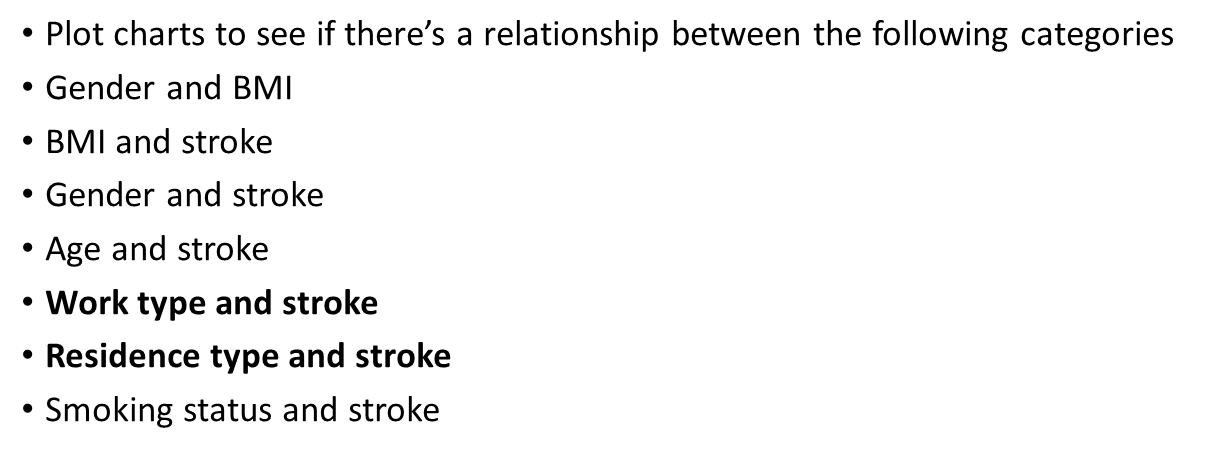



In [110]:
fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
#Create one or more subplots using add_subplot, because you can't create blank figure
#ax = fig.add_subplot(1,1,1)
#Variable
#ax.hist(df['age'],bins = 7) # Here you can play with number of bins
#Labels and Tit
#plt.title('Age distribution')
#plt.xlabel('age')
##plt.ylabel('#Employee')



<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


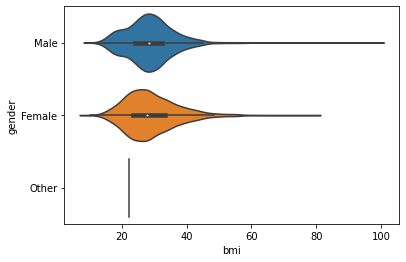

In [ ]:
sns.violinplot(df['bmi'], df['gender']) #Variable Plot

In [111]:
#var = df.groupby('gender')
#fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)
###ax1.set_xlabel('gender')
#ax1.set_ylabel('bmi')
#ax1.set_title("xx")
#var.plot(kind='bar')

In [ ]:
#DATA VISUALISATION 

#Chart one - bar chart 

#ax = df[['gender','stroke']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel("gender", fontsize=12)
#ax.set_ylabel("stroke", fontsize=12)
#plt.show()

#plot_df = df[['gender','stroke']]
#df.plot.scatter(x="stroke", y="gender", s=10, title="Price of rooms depending on location", c='green')


#my_labels = df['age'],df['bmi']
##plt.pie(df[['age','bmi']],labels=my_labels,autopct='%1.1f%%')
#plt.title('My Title')
#plt.axis('equal')
#plt.show()


Data pre-processing


In [ ]:

df.isnull().values.any() #This shows if there are any missing values in the dataset. True = yes false = No

True

In [ ]:
df.isnull().sum().sum() #The total of missing values in the dataset

201

In [ ]:
df.isnull().sum() #This locates where the missing values are located in each feature

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#As we cannot create our own BMI values due to hospital ethics i have decided to drop any missing rows with missing bmi values

df = df.dropna()
print(df)


         id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
5     56669    Male  81.0  ...  29.0  formerly smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5104  14180  Female  13.0  ...  18.6          Unknown      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[4909 rows x 12 columns]


In [ ]:
#check if it droped the missing value rows
df['bmi'].isnull()
df.isnull().sum().sum()

0

In [ ]:
# Find a duplicate rows
duplicateDFRow = df[df.duplicated()]
print("duplicate rows:"), (duplicateDFRow)

#find duplicate row based on a column 
#duplicateDFRow = df[df.duplicated(['Name'])]
#print(duplicateDFRow)

duplicate rows:


(None, Empty DataFrame
 Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
 Index: [])

In [ ]:
#checking for data types

df.dtypes #The type of data in each column

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

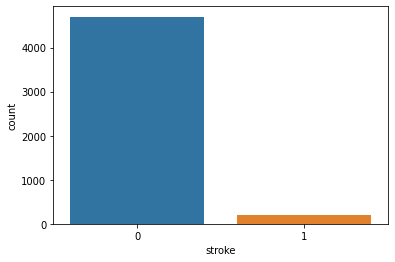

In [61]:

# Summarise class details
sns.countplot(x=df['stroke'])
##stroke: 1 if the patient had a stroke or 0 if not

In [73]:
##removing unnecessary columns
#x is training data it contains features and models - 'Class' is something we need to PREDICT therefore we need to drop that column 
x = df.drop(['work_type', 'Residence_type', 'ever_married', 'id', 'stroke', 'smoking_status','gender'], axis=1) #Class is not a feature it's just a label  axis = 1 shows we are using columns 
print(x.info())
x.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   hypertension       4909 non-null   int64  
 2   heart_disease      4909 non-null   int64  
 3   avg_glucose_level  4909 non-null   float64
 4   bmi                4909 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 390.1 KB
None


,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
5,81.0,0,0,186.21,29.0


In [ ]:
#number of rows if df
len(df)

4909

Feature engineering 

In [63]:

#Extracting labels and features 

#Extracting labels 
y= df['stroke']
print(y.value_counts())
#Since the labels 0 and 1 are already are numerical values they do not need to be converted for the model.
#If the labels were in a catergorical state then you could use the label encoder to convert them

0    4700
1     209
Name: stroke, dtype: int64


In [100]:
#MODEL ONE

#Using 8 features and 2 hidden layers 
#building the model - using training data 
#calculating if the probability is closer to 0 or 1 
x1 =x.iloc[:, 0:5] #locating part of the data frame the first 8 and call it X1 
x1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
5,81.0,0,0,186.21,29.0


In [101]:
from sklearn.preprocessing import LabelEncoder #need to convert labels - strings into boolean values etc 
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn import metrics
#Spliting the data into train (70%) and validation (30%)
X_train1, X_val1, y_train1, y_val1 = train_test_split(x1, y, test_size=0.3, random_state=100) #random state - regenerate the split again 
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 3436
validation data set size: 1473


In [103]:
#Building model One

# define the keras model
model1 = Sequential()
model1.add(Dense(12, input_dim=5, activation='relu')) #Defining our hidden layer - adding the layers to the model, a dence layer, 12 neurons, we selected 8 features so 8 input dimentions .
model1.add(Dense(8, activation='relu')) #second hidden layer
#using relu for hidden layers not for output layers 
model1.add(Dense(1, activation='sigmoid')) #creating our output layer with one neurone 

model1.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                72        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [104]:
import tensorflow as tf
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
model1.fit(X_train1, y_train1, batch_size=50, epochs=20, validation_data=(X_val1, y_val1))

Epoch 1/20
69/69 [==============================] - 1s 5ms/step - loss: 0.5782 - accuracy: 0.9066 - val_loss: 0.2780 - val_accuracy: 0.9593
Epoch 2/20
69/69 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.9569 - val_loss: 0.1882 - val_accuracy: 0.9593
Epoch 3/20
69/69 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9529 - val_loss: 0.1674 - val_accuracy: 0.9593
Epoch 4/20
69/69 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9543 - val_loss: 0.1624 - val_accuracy: 0.9593
Epoch 5/20
69/69 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9611 - val_loss: 0.1600 - val_accuracy: 0.9593
Epoch 6/20
69/69 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9543 - val_loss: 0.1554 - val_accuracy: 0.9593
Epoch 7/20
69/69 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.9601 - val_loss: 0.1561 - val_accuracy: 0.9593
Epoch 8/20
69/69 [==

In [106]:

# get model predictions for validation data
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

[[0.04034331]
 [0.0081484 ]
 [0.01440036]
 [0.08122668]
 [0.09972963]
 [0.20552886]
 [0.01238847]
 [0.0030916 ]
 [0.0119693 ]
 [0.03950036]]


In [107]:
y_pred_categorical1 = []
for pred in y_pred1:
  if pred > 0.5:
    y_pred_categorical1.append(1)
  else:
    y_pred_categorical1.append(0)
  

print(y_pred_categorical1[:10])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [108]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9592668024439919
